In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
data='/content/drive/MyDrive/Soil types'

In [4]:
train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

In [5]:
validation= ImageDataGenerator(rescale=1./255)
testset=ImageDataGenerator(rescale=1./255)

In [19]:
training_set=train.flow_from_directory('/content/drive/MyDrive/Soil types',target_size=(64,64),
                                   batch_size=32,class_mode='categorical',subset='training')

Found 126 images belonging to 5 classes.


In [20]:
validation_generator=train.flow_from_directory('/content/drive/MyDrive/Soil types',target_size=(64,64),
                                     batch_size=32,class_mode='categorical',subset='validation')

Found 30 images belonging to 5 classes.


In [21]:
test=testset.flow_from_directory('/content/drive/MyDrive/Soil types',target_size=(64,64),
                                     batch_size=32,class_mode='categorical')

Found 156 images belonging to 5 classes.


In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [23]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

In [26]:
history = model.fit(training_set,epochs=20,validation_data=validation_generator)

Epoch 1/20
4/4 [==============================] - 9s 3s/step - loss: 1.5173 - accuracy: 0.2778 - val_loss: 1.3863 - val_accuracy: 0.3667
Epoch 2/20
4/4 [==============================] - 1s 200ms/step - loss: 1.3444 - accuracy: 0.3810 - val_loss: 1.1145 - val_accuracy: 0.3667
Epoch 3/20
4/4 [==============================] - 1s 196ms/step - loss: 1.1389 - accuracy: 0.3492 - val_loss: 0.9365 - val_accuracy: 0.6000
Epoch 4/20
4/4 [==============================] - 1s 195ms/step - loss: 1.0083 - accuracy: 0.4603 - val_loss: 0.8950 - val_accuracy: 0.6000
Epoch 5/20
4/4 [==============================] - 1s 184ms/step - loss: 1.0347 - accuracy: 0.3810 - val_loss: 0.8814 - val_accuracy: 0.4333
Epoch 6/20
4/4 [==============================] - 1s 197ms/step - loss: 1.0197 - accuracy: 0.4683 - val_loss: 0.8624 - val_accuracy: 0.6000
Epoch 7/20
4/4 [==============================] - 1s 193ms/step - loss: 0.9243 - accuracy: 0.6032 - val_loss: 0.8770 - val_accuracy: 0.5667
Epoch 8/20
4/4 [=======

In [27]:
hist=model.history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

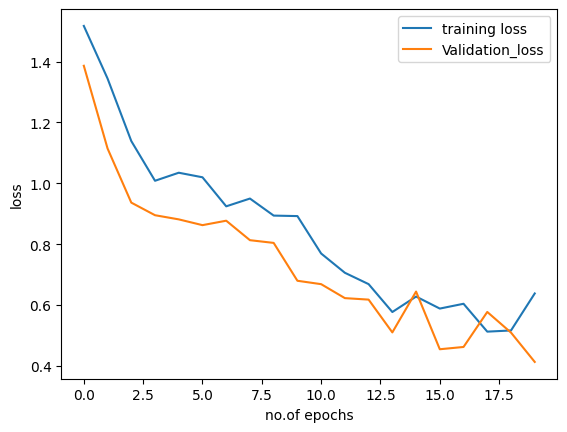

In [28]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='Validation_loss')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

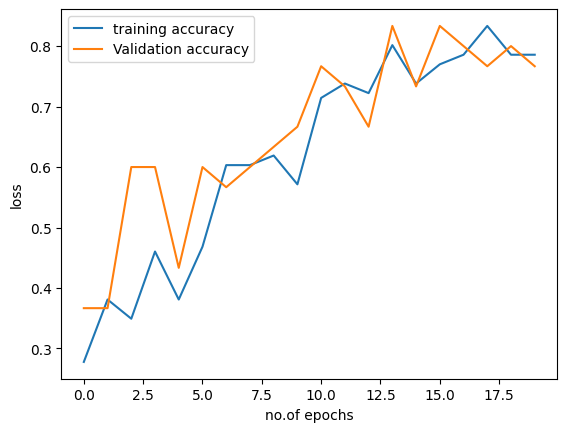

In [29]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('loss')

In [30]:
test_acc=model.evaluate(test)
print(f'Test accuracy: {test_acc}')

5/5 [==============================] - 1s 175ms/step - loss: 0.4956 - accuracy: 0.8205
Test accuracy: [0.49561601877212524, 0.8205128312110901]


In [31]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
class_labels = ['Black soil', 'Cinder soil', 'Laterite soil', 'Peat soil', 'Yellow soil']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64,64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_soil_class(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    return class_labels[predicted_class]

1/1 [==============================] - 0s 396ms/step
The predicted soil class is: Yellow soil


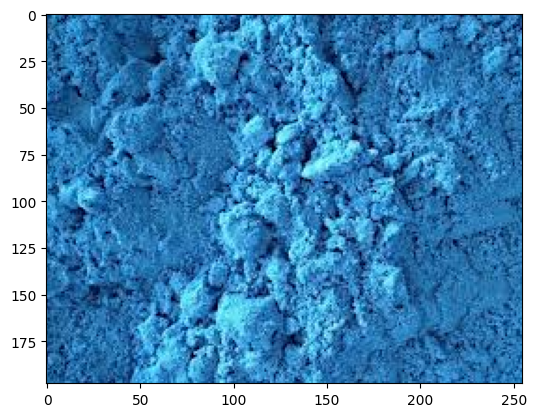

In [32]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Soil types/Yellow Soil/13.jpg'))
img_path = '/content/drive/MyDrive/Soil types/Yellow Soil/13.jpg'
predicted_class = predict_soil_class(img_path)
print(f'The predicted soil class is: {predicted_class}')

1/1 [==============================] - 0s 18ms/step
The predicted soil class is: Cinder soil


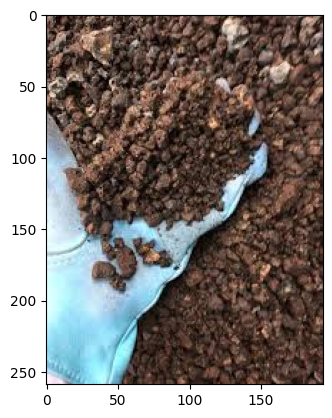

In [35]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Soil types/Cinder Soil/16.jpg'))
img_path = '/content/drive/MyDrive/Soil types/Cinder Soil/16.jpg'
predicted_class = predict_soil_class(img_path)
print(f'The predicted soil class is: {predicted_class}')

1/1 [==============================] - 0s 31ms/step
The predicted soil class is: Laterite soil


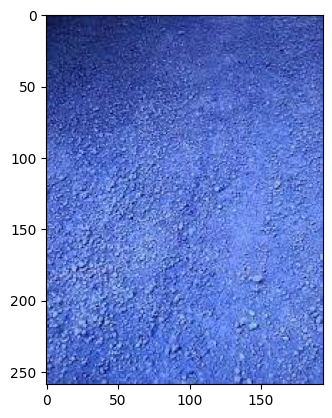

In [34]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Soil types/Laterite Soil/1.jpg'))
img_path = '/content/drive/MyDrive/Soil types/Laterite Soil/1.jpg'
predicted_class = predict_soil_class(img_path)
print(f'The predicted soil class is: {predicted_class}')